In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [136]:
df=pd.read_csv('/content/OnlineRetail.csv',encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [137]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [139]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [140]:
null_columns=['Description','CustomerID']
for i in null_columns:
  df=df.dropna(subset=[i])

df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [141]:
df.shape

(406829, 8)

In [142]:
df[df['InvoiceNo'].astype(str).str.contains('[A-Za-z]')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [143]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features=df.select_dtypes(include=['object']).columns.tolist()

In [144]:
numerical_features

['Quantity', 'UnitPrice', 'CustomerID']

In [145]:
categorical_features

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']

In [146]:
def boxplot(df,columns):
  plt.figure(figsize=(10,5))
  for i in columns:
    plt.subplot(3,3,columns.index(i)+1)
    plt.title(f"Boxplot for {i}")
    sns.boxplot(df[i])
  plt.tight_layout()
  plt.show()

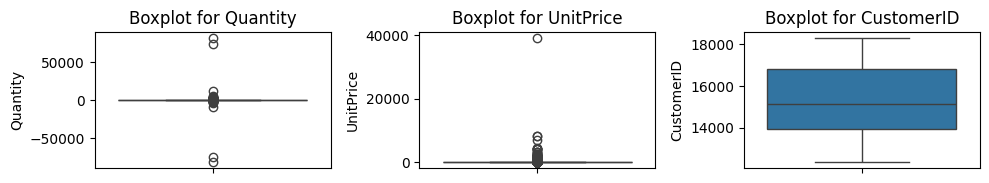

In [147]:
boxplot(df,numerical_features)

In [148]:
(df['Quantity']==0).sum()

np.int64(0)

In [149]:
(df['Quantity'] < 0).sum()


np.int64(8905)

In [150]:
p_low=df['UnitPrice'].quantile(0.01)
p_high=df['UnitPrice'].quantile(0.99)
df=df[(df['UnitPrice']>=p_low)& (df['UnitPrice']<=p_high)]

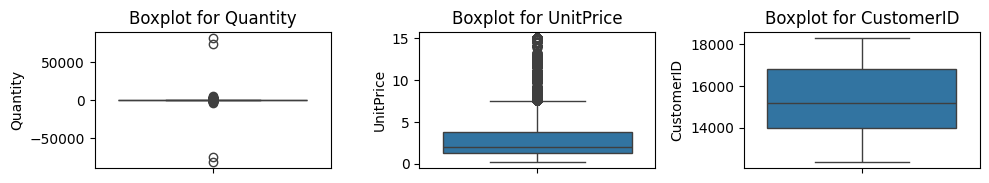

In [151]:
boxplot(df,numerical_features)

In [152]:
# Separate normal sales and cancellations
returns_df=df[df['InvoiceNo'].astype(str).str.startswith('C')]
sales_df=df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [153]:
(returns_df['Quantity']<0).sum()

np.int64(8503)

In [154]:
(sales_df['Quantity']<0).sum()

np.int64(0)

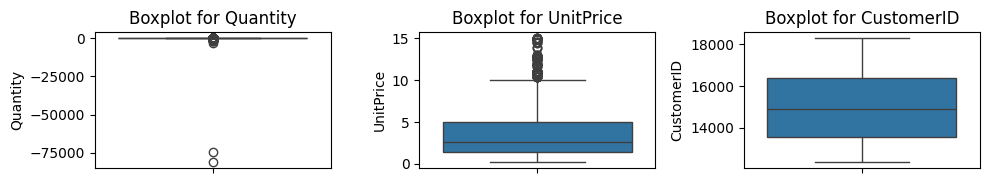

In [155]:
boxplot(returns_df,numerical_features)

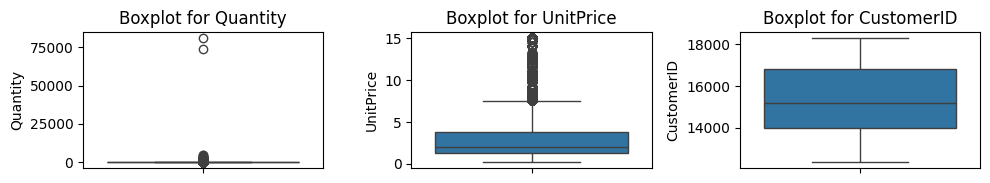

In [156]:
boxplot(sales_df,numerical_features)

In [157]:
df=sales_df.copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [158]:
df['Toltaprice']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Toltaprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391394 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    391394 non-null  object 
 1   StockCode    391394 non-null  object 
 2   Description  391394 non-null  object 
 3   Quantity     391394 non-null  int64  
 4   InvoiceDate  391394 non-null  object 
 5   UnitPrice    391394 non-null  float64
 6   CustomerID   391394 non-null  float64
 7   Country      391394 non-null  object 
 8   Toltaprice   391394 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.9+ MB


In [160]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391394 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391394 non-null  object        
 1   StockCode    391394 non-null  object        
 2   Description  391394 non-null  object        
 3   Quantity     391394 non-null  int64         
 4   InvoiceDate  391394 non-null  datetime64[ns]
 5   UnitPrice    391394 non-null  float64       
 6   CustomerID   391394 non-null  float64       
 7   Country      391394 non-null  object        
 8   Toltaprice   391394 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 29.9+ MB


In [161]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Toltaprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [162]:
from datetime import datetime, timedelta

reference_date=df['InvoiceDate'].max()+timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [163]:
rfm=df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(reference_date-x.max()).days,
    'InvoiceNo':'nunique',
    'Toltaprice':'sum'

}).reset_index()
rfm.columns=['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1437.24
3,12349.0,19,1,1353.80
4,12350.0,310,1,294.40
...,...,...,...,...
4322,18280.0,278,1,180.60
4323,18281.0,181,1,46.92
4324,18282.0,8,2,178.05
4325,18283.0,4,16,2078.93


In [164]:
behavioral=df.groupby('CustomerID').agg({
    'Quantity':'sum',
    'InvoiceNo':'nunique',
    'Toltaprice':['sum','mean','std'],
    'StockCode':'nunique',
    'InvoiceDate':lambda x:(x.max()-x.min()).days

}).reset_index()

behavioral.columns=['CustomerID','TotalQuantity','NumOrders','Totalsales','AvgOrderPrice','StdOrderPrice','UniqueProducts','CustomerLifetime']

behavioral['AvgBasketSize']=behavioral['TotalQuantity']/behavioral['NumOrders']
behavioral['OrderFrequency']=behavioral['NumOrders']/(behavioral['CustomerLifetime']+1)
behavioral['StdOrderPrice']=behavioral['StdOrderPrice'].fillna(0)


behavioral

,CustomerID,TotalQuantity,NumOrders,Totalsales,AvgOrderPrice,StdOrderPrice,UniqueProducts,CustomerLifetime,AvgBasketSize,OrderFrequency
0,12346.0,74215,1,77183.60,77183.600000,0.000000,1,0,74215.000000,1.000000
1,12347.0,2458,7,4310.00,23.681319,23.289902,103,365,351.142857,0.019126
2,12348.0,2332,4,1437.24,53.231111,37.159075,21,282,583.000000,0.014134
3,12349.0,625,1,1353.80,19.340000,10.029097,70,0,625.000000,1.000000
4,12350.0,196,1,294.40,18.400000,5.214211,16,0,196.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
4322,18280.0,45,1,180.60,18.060000,3.380319,10,0,45.000000,1.000000
4323,18281.0,52,1,46.92,9.384000,5.963378,5,0,52.000000,1.000000
4324,18282.0,103,2,178.05,14.837500,5.853579,12,118,51.500000,0.016807
4325,18283.0,1396,16,2078.93,2.753550,2.506013,262,333,87.250000,0.047904


In [165]:
features=pd.merge(rfm,behavioral[['CustomerID', 'AvgBasketSize', 'AvgOrderPrice',
                                     'UniqueProducts', 'CustomerLifetime', 'OrderFrequency']],on='CustomerID')
features

,CustomerID,Recency,Frequency,Monetary,AvgBasketSize,AvgOrderPrice,UniqueProducts,CustomerLifetime,OrderFrequency
0,12346.0,326,1,77183.60,74215.000000,77183.600000,1,0,1.000000
1,12347.0,2,7,4310.00,351.142857,23.681319,103,365,0.019126
2,12348.0,75,4,1437.24,583.000000,53.231111,21,282,0.014134
3,12349.0,19,1,1353.80,625.000000,19.340000,70,0,1.000000
4,12350.0,310,1,294.40,196.000000,18.400000,16,0,1.000000
...,...,...,...,...,...,...,...,...,...
4322,18280.0,278,1,180.60,45.000000,18.060000,10,0,1.000000
4323,18281.0,181,1,46.92,52.000000,9.384000,5,0,1.000000
4324,18282.0,8,2,178.05,51.500000,14.837500,12,118,0.016807
4325,18283.0,4,16,2078.93,87.250000,2.753550,262,333,0.047904
